In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib as mpl
import corner
import seaborn.apionly as sns
import pandas as pd
%matplotlib inline

/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [48]:
df = pd.read_csv('results/test_chain_gpuSSP.csv')
df_accept = pd.read_csv('results/test_accept_gpuSSP.csv')
# df = pd.read_csv('results/test_chain_gpu.csv')
# df_accept = pd.read_csv('results/test_accept_gpu.csv')
df.head()

,logz,logdust,logNpix,logage,lnprob,N_walkers
0,-0.6701,-2.8082,2.7238,8.2875,-2.091933e+06,20
1,-1.1420,-3.9409,1.4023,7.4757,-2.080103e+06,20
2,-1.1420,-3.9409,1.4023,7.4757,-2.080103e+06,20
3,-1.1420,-3.9409,1.4023,7.4757,-2.080103e+06,20
4,-1.1420,-3.9409,1.4023,7.4757,-2.080103e+06,20


In [13]:
df_accept.head(100)

,acceptance
0,0.0014
1,0.0018
2,0.0068
3,0.0004
4,0.0016
5,0.0006
6,0.0018
7,0.0036
8,0.0020
9,0.0040


In [35]:
len(df)

100000

In [36]:
logSFH = df[['logSFH0', 'logSFH1', 'logSFH2', 'logSFH3', 'logSFH4', 'logSFH5', 'logSFH6']].values

In [37]:
logNpix = np.log10(np.sum(10.**logSFH, axis=1))

In [38]:
df['logNpix'] = logNpix

In [49]:
# params = df.columns
# params = params.delete(-2)

params=df.columns[:5]

In [50]:
N_walkers = df['N_walkers'][0]
N_steps = len(df) / N_walkers
N_params = len(params) 

In [51]:
flatchains = df[params].values
chains = flatchains.reshape((N_walkers, N_steps, N_params))

In [52]:
walkers = np.arange(N_walkers)
steps = np.arange(N_steps)

In [53]:
SFH = np.log10(1e2 / 7.)
truths = np.array([-0.2, -2., SFH, SFH, SFH, SFH, SFH, SFH, SFH, -np.inf, 2.])
truths = np.array([-0.2, -2., 2., 9.6, -np.inf])

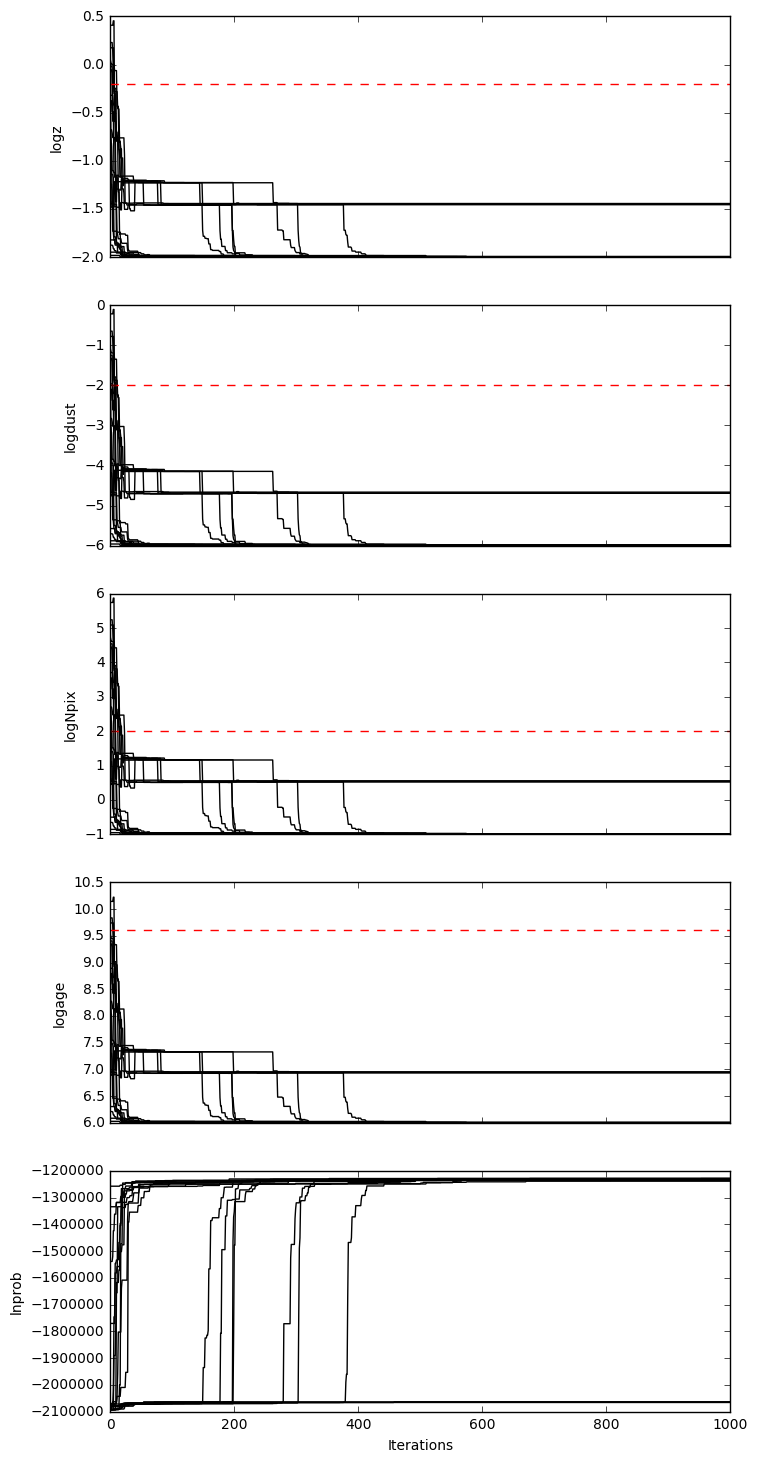

In [54]:
fig, axes = plt.subplots(nrows=N_params, figsize=(8, 18), sharex=True)
for d in np.arange(N_params):    
    for w in walkers:
#         if w != 13:
#             continue
        axes[d].plot(steps, chains[w,:,d], 'k-')
    axes[d].axhline(y=truths[d], ls='--', color='r')
    axes[d].set_ylabel(params[d])
axes[-1].set_xlabel('Iterations')
# axes[-1].set_ylim([0, 6])

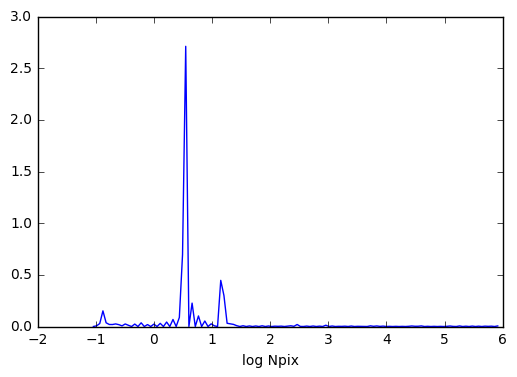

In [11]:
sns.kdeplot(df['logNpix'].values)
plt.xlabel('log Npix')

In [107]:
len(df)

100000

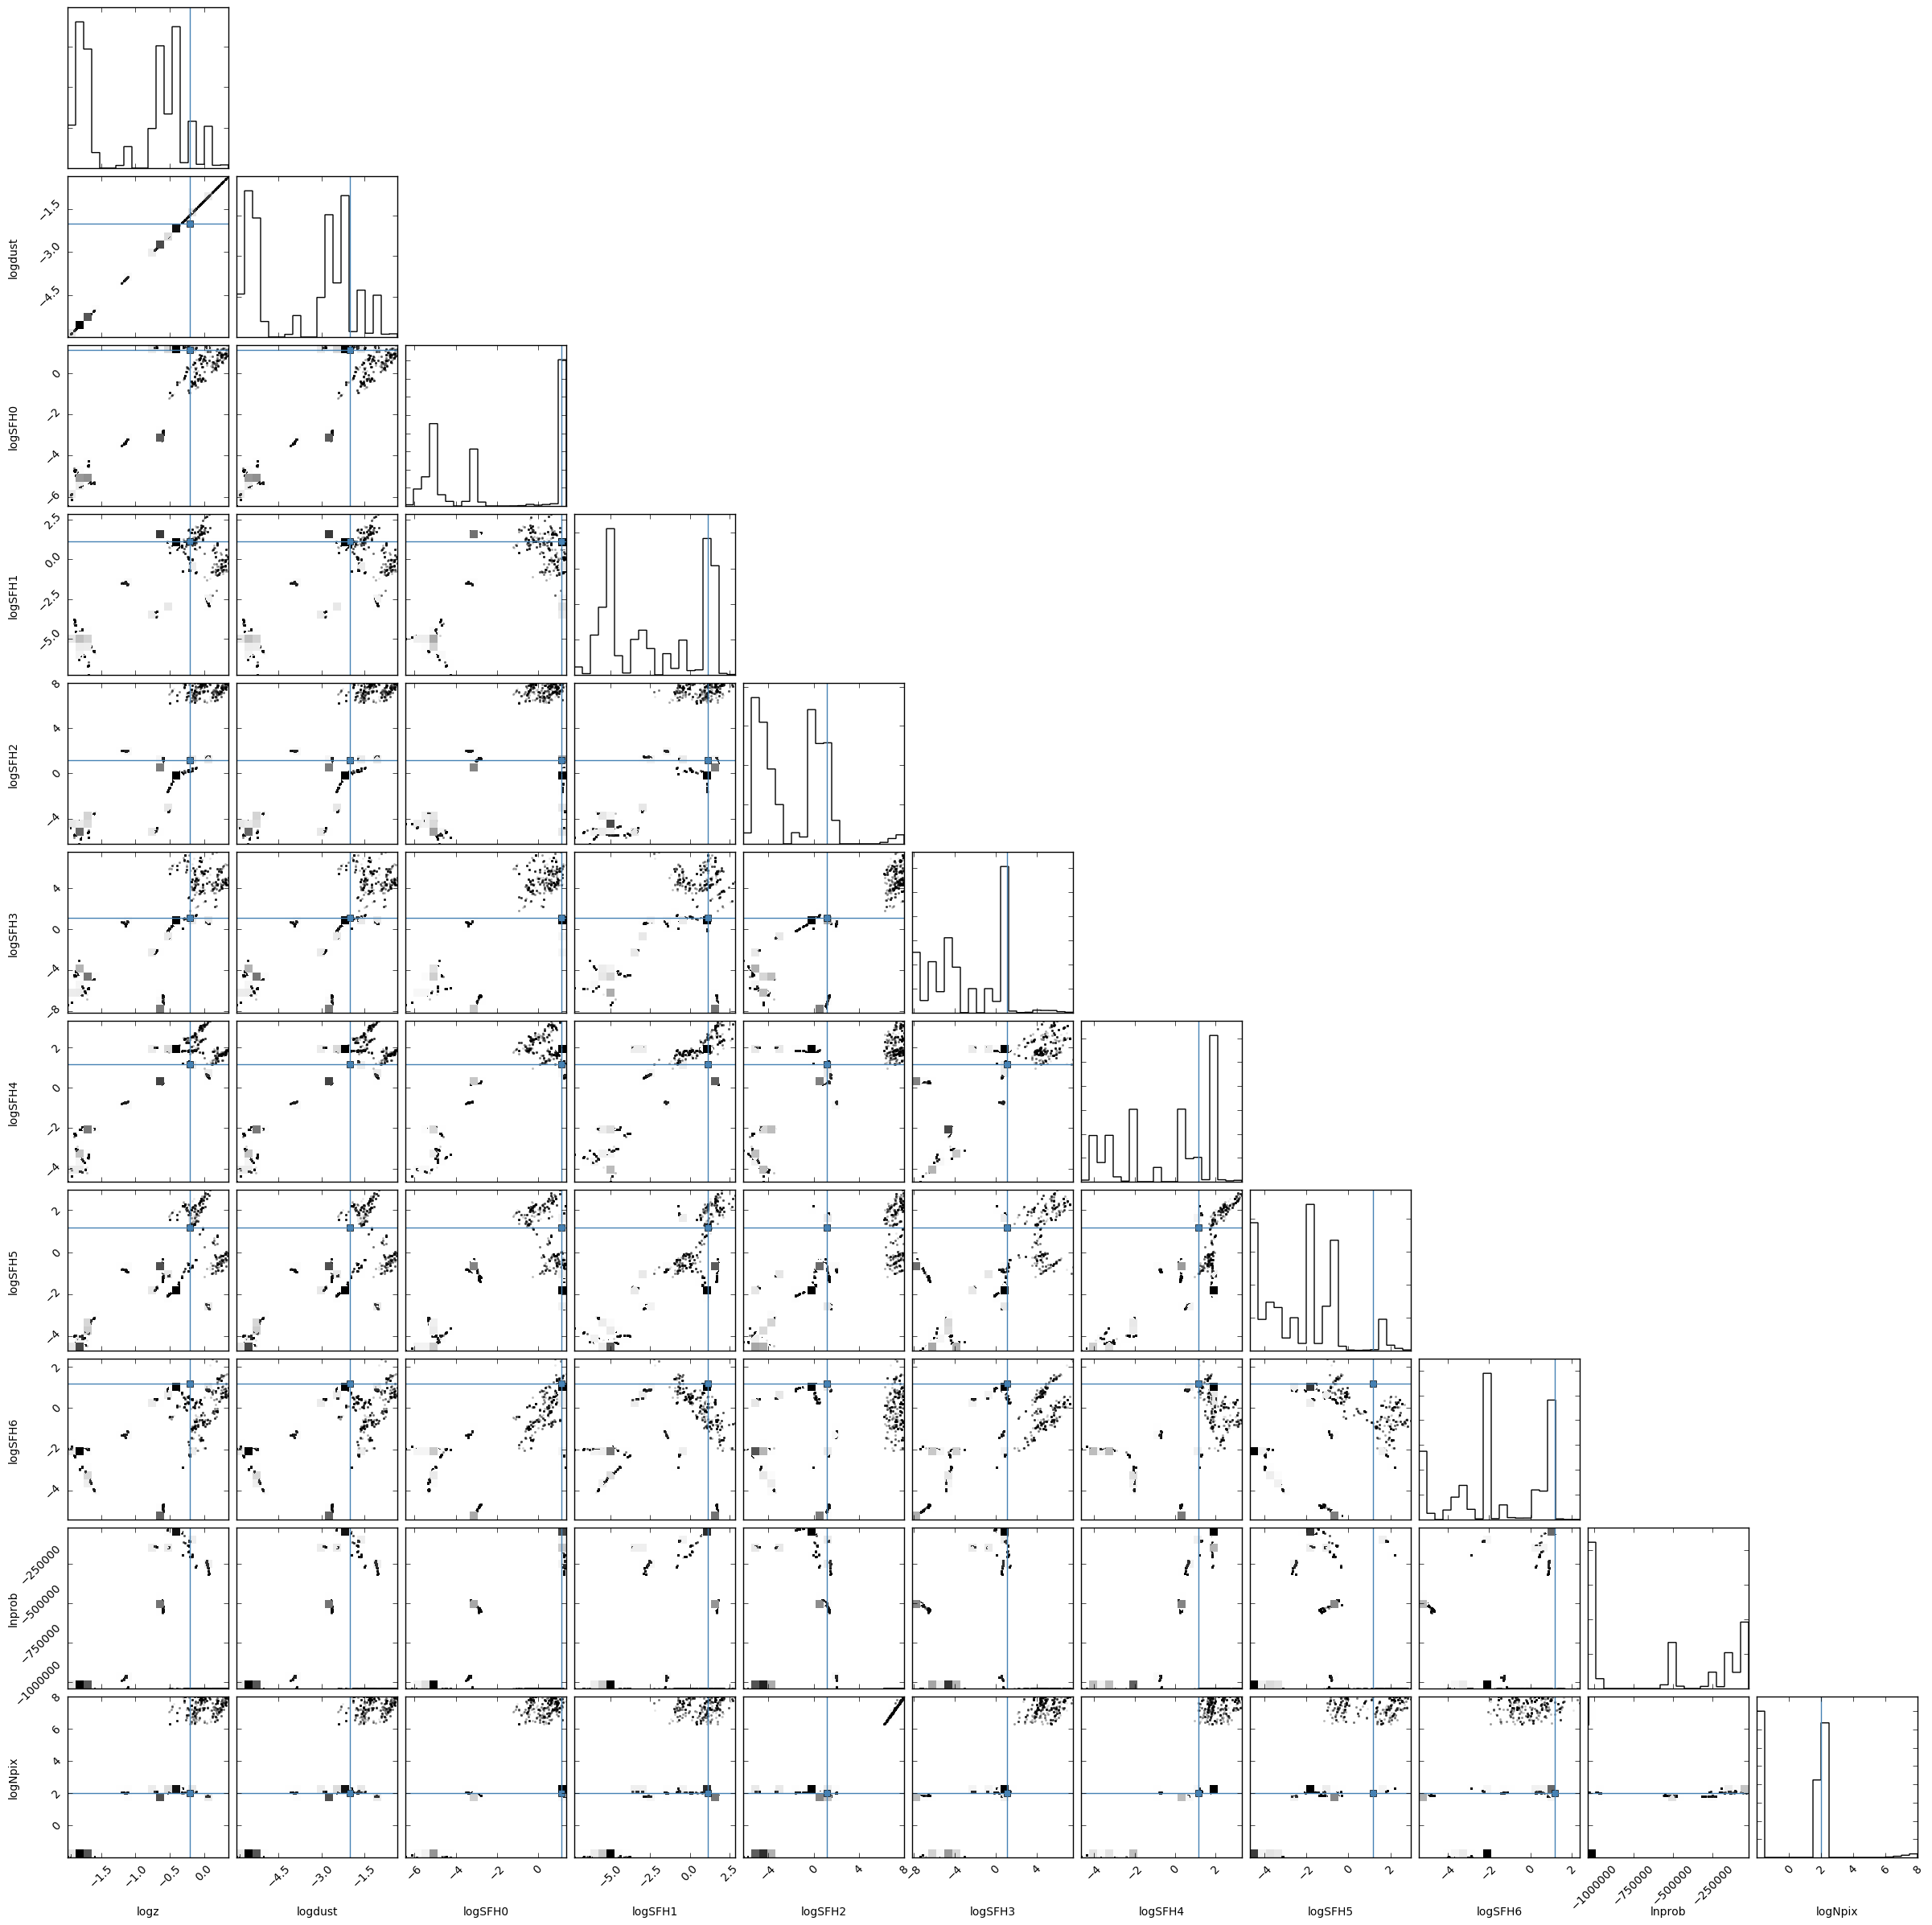

In [25]:
a = corner.corner(df[params],  truths=truths, plot_contours=False)